# Autoencoders for image compression

### Importing the libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, AveragePooling2D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

### Loading the dataset

- Dataset: https://keras.io/api/datasets/cifar10/ and https://www.cs.toronto.edu/~kriz/cifar.html

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 47s 0us/step


In [4]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [5]:
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [6]:
32 * 32

1024

### Visualizing the images

/Users/mz195/Library/Python/3.8/lib/python/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


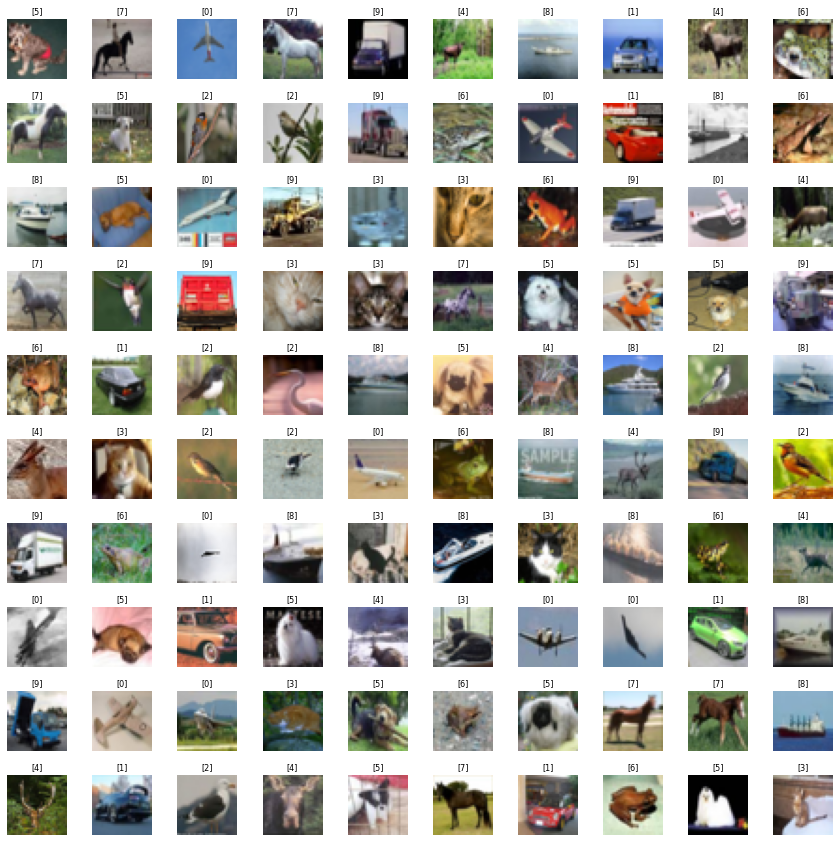

In [7]:
width = 10
height = 10

fig, axes = plt.subplots(height, width, figsize = (15,15))
axes = axes.ravel()
for i in np.arange(0, width * height):
    index = np.random.randint(0, 50000)
    axes[i].imshow(X_train[index], cmap = 'gray' )
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4);

### Pre-processing the images

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

### Building and training the convolutional autoencoder

In [10]:
# BatchNormalization: https://keras.io/api/layers/normalization_layers/batch_normalization/

autoencoder = tf.keras.models.Sequential()

# Encoder
autoencoder.add(Conv2D(64, (3,3), activation = 'relu', padding='same', input_shape=(32, 32, 3)))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D((2,2), padding="same"))

autoencoder.add(Conv2D(32, (3,3), activation = 'relu', padding='same'))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D((2,2), padding="same"))

autoencoder.add(Conv2D(16, (3,3), activation = 'relu', padding="same"))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D((2,2), padding="same")) # Encoded image

# Decoder
autoencoder.add(Conv2D(16, (3,3), activation = 'relu', padding="same"))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D((2, 2)))

autoencoder.add(Conv2D(32, (3,3), activation = 'relu', padding="same"))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D((2, 2)))

autoencoder.add(Conv2D(64, (3,3), activation = 'relu', padding="same"))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D((2, 2)))

autoencoder.add(Conv2D(3, (3,3), activation='sigmoid', padding="same"))

In [11]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
average_pooling2d_1 (Average (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          4

In [ ]:
# Output = (Input - Filter + 1) / Stride

In [12]:
autoencoder.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [13]:
autoencoder.fit(X_train, X_train, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 134s 86ms/step - loss: 0.5828 - accuracy: 0.6473
Epoch 2/50
1563/1563 [==============================] - 140s 89ms/step - loss: 0.5679 - accuracy: 0.7239
Epoch 3/50
1563/1563 [==============================] - 144s 92ms/step - loss: 0.5645 - accuracy: 0.7418
Epoch 4/50
1563/1563 [==============================] - 144s 92ms/step - loss: 0.5631 - accuracy: 0.7498
Epoch 5/50
1563/1563 [==============================] - 144s 92ms/step - loss: 0.5621 - accuracy: 0.7555
Epoch 6/50
1563/1563 [==============================] - 151s 97ms/step - loss: 0.5615 - accuracy: 0.7583
Epoch 7/50
1563/1563 [==============================] - 148s 94ms/step - loss: 0.5610 - accuracy: 0.7600
Epoch 8/50
1563/1563 [==============================] - 147s 94ms/step - loss: 0.5605 - accuracy: 0.7630
Epoch 9/50
1563/1563 [==============================] - 150s 96ms/step - loss: 0.5603 - accuracy: 0.7646
Epoch 10/50
1563/1563 [==============================] 

### Encoding and decoding the test images

In [14]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('average_pooling2d_2').output)
encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
average_pooling2d_1 (Average (None, 8, 8, 32)          0     

In [15]:
coded_test_images = encoder.predict(X_test)

In [16]:
coded_test_images.shape

(10000, 4, 4, 16)

In [17]:
coded_test_images[0]

array([[[-0.37940046, -0.05493981,  0.03379709, -0.05088848,
          0.15964174,  0.04658232,  0.5718995 , -0.08273053,
         -0.2036824 , -0.09887052,  0.41408032, -0.22447786,
          0.14970043,  0.09325643, -0.14112693,  0.40446454],
        [-0.28117144,  0.07302469,  0.13812023,  0.11734286,
         -0.0254764 ,  0.04791363,  0.33243224,  0.09667578,
          0.15805146, -0.29729164, -0.04489813, -0.10861987,
         -0.07100016,  0.08440164, -0.5046488 ,  0.4351519 ],
        [-0.11286418,  0.06552026,  0.14215995,  0.05506611,
          0.16433735, -0.29311883,  0.27103058,  0.13413474,
          0.10207681, -0.01672835,  0.21237001, -0.22253074,
         -0.34825468,  0.01939649, -0.19086549, -0.02817976],
        [-0.37034777,  0.01224552,  0.46204638, -0.10958498,
          0.22417964, -0.11675008, -0.02972665,  0.13112366,
          0.06357989, -0.06406063,  0.2848835 , -0.09030837,
          0.02152627,  0.13446884, -0.1958139 ,  0.11296837]],

       [[ 0.079416

In [18]:
decoded_test_images = autoencoder.predict(X_test)
decoded_test_images.shape

(10000, 32, 32, 3)

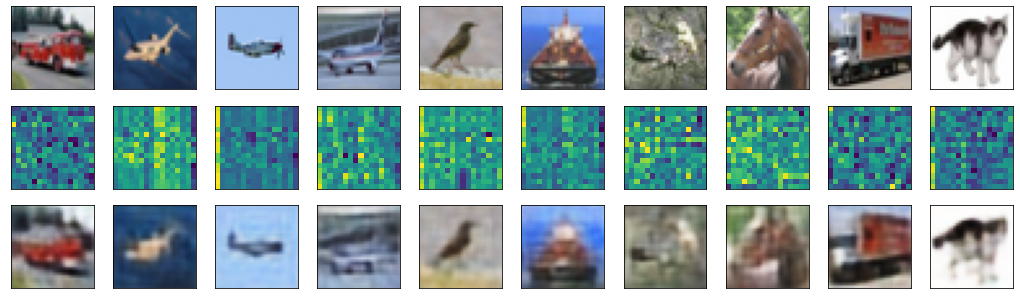

In [19]:
n_images = 10
test_images = np.random.randint(0, X_test.shape[0], size = n_images)
plt.figure(figsize=(18,18))
for i, image_index in enumerate(test_images):
  
    # Original image
    ax = plt.subplot(10,10,i + 1)
    plt.imshow(X_test[image_index].reshape(32,32,3))
    plt.xticks(())
    plt.yticks(())

    # Coded image
    ax = plt.subplot(10,10,i + 1 + n_images)
    plt.imshow(coded_test_images[image_index].reshape(16,16))
    plt.xticks(())
    plt.yticks(())

    # Decoded image
    ax = plt.subplot(10,10,i + 1 + n_images * 2)
    plt.imshow(decoded_test_images[image_index].reshape(32,32,3))
    plt.xticks(())
    plt.yticks(())